# Traditional ML Models

## Overview
This notebook implements and evaluates traditional machine learning models.

## Responsibilities
- Load processed data from `data/processed/`
- Implement models:
  - Logistic Regression
  - Random Forest
  - Support Vector Machine (SVM)
  - Decision Tree
  - K-Nearest Neighbors (KNN)
  - Naive Bayes
- Train and evaluate each model
- Save trained models to `models/`
- Compare performance metrics

## Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

## Required Files
- `data/processed/X_train.csv`
- `data/processed/X_test.csv`
- `data/processed/y_train.csv`
- `data/processed/y_test.csv`

## Status
⏳ **Waiting for preprocessing** - [Teammate Name]

---

*TODO: Add traditional models Markdowns and Codes in this Notebook*

# Project 1: Diabetes Prediction

**Author:** Mohamed AshraF  


---

## Overview
This notebook contains the preprocessing, cleaning, and machine learning models applied to the diabetes dataset (`cleaned_dataset_full.csv`).  

Steps performed:  
1. **Data Loading & Inspection** – Loaded the dataset and checked the number of samples, features, missing values, and duplicates.  
2. **Data Cleaning** – Removed duplicates and saved the cleaned full dataset as `cleaned_dataset_full.csv`.  
3. **Feature Scaling** – Applied `StandardScaler` to all features.  
4. **Train/Test Split** – Split data into training and testing sets (80%/20%) while maintaining class distribution.  
5. **Model Training & Evaluation** – Applied the following models:
   - K-Nearest Neighbors (KNN)  
   - Decision Tree Classifier  
   - Naive Bayes  
   - [Other models to be added by team]  
6. **Results Comparison** – Accuracy and F1-score for each class are compared in a summary table.  

---

**Note:**  
- All preprocessing steps and CSVs are saved in `../data/processed/`.  
- This notebook is prepared in collaboration with the team. Each member will add their respective models and analysis before the final report.


استوردنا المكتبات الأساسية للتعامل مع البيانات، تحليلها، رسم الرسومات، تقسيمها، وتطبيق موديلات الـ ML، وكمان حفظ أي أدوات مهمة مثل الـ scaler.

In [86]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & train/test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Saving scaler
import joblib


Dataset جاهزة بعد cleaning و processing، وعدد الصفوف 229,781 وعدد الأعمدة 22. الهدف (target) هو Diabetes_012.

In [87]:
df = pd.read_csv('../data/processed/cleaned_dataset_full.csv')
print(f"Full cleaned dataset shape: {df.shape}")
df.head()


Full cleaned dataset shape: (229781, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


استخدمنا الملفات الجاهزة للـ training والـ testing.

In [88]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')


حولت الأعمدة إلى صف واحد لكل y لتكون صالحة لتدريب الموديلات.

In [89]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (183824, 21), y_train shape: (183824,)
X_test shape: (45957, 21), y_test shape: (45957,)


KNN


In [90]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8154796875339991
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38012
         1.0       0.05      0.00      0.00       926
         2.0       0.41      0.21      0.28      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.39      0.39     45957
weighted avg       0.77      0.82      0.78     45957



Decision Tree 


In [91]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7418238788432665
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     38012
         1.0       0.02      0.03      0.03       926
         2.0       0.29      0.31      0.30      7019

    accuracy                           0.74     45957
   macro avg       0.39      0.39      0.39     45957
weighted avg       0.76      0.74      0.75     45957



Naive Bayes

In [92]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7414104488978828
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     38012
         1.0       0.04      0.01      0.02       926
         2.0       0.33      0.57      0.42      7019

    accuracy                           0.74     45957
   macro avg       0.42      0.46      0.43     45957
weighted avg       0.79      0.74      0.76     45957



لماذا الرسم ده مهم؟

Accuracy لوحدها ممكن تخفي مشاكل الموديلات.

مثال: لو Class 1 قليل جدًا، Accuracy ممكن تكون عالية بس الموديل ميعرفش يتعرف على Class 1.

Confusion matrix يوريك أي Class الموديل صعب عليه التنبؤ.

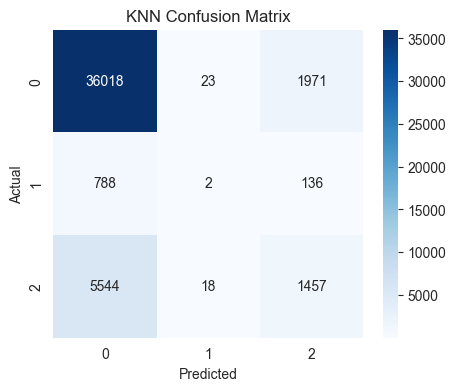

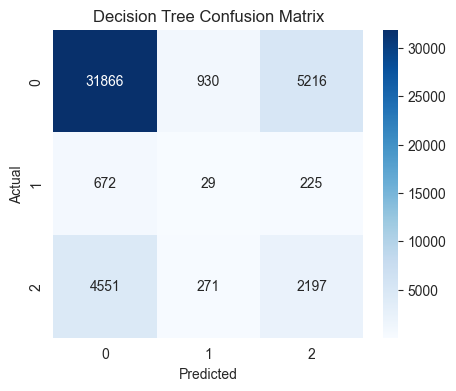

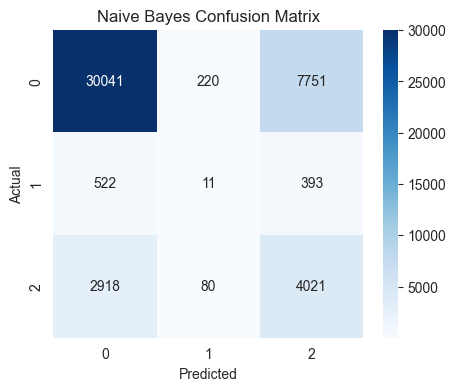

In [93]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, y_pred_knn, "KNN")
plot_confusion(y_test, y_pred_dt, "Decision Tree")
plot_confusion(y_test, y_pred_nb, "Naive Bayes")


In [94]:
# Models dictionary
models = {
    "KNN": (knn, y_pred_knn),
    "Decision Tree": (dt, y_pred_dt),
    "Naive Bayes": (nb, y_pred_nb)
}

# Prepare comparison table
comparison_data = []

for model_name, (model, y_pred) in models.items():
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # بطبع المفاتيح عشان اعرف شكلها
    print(f"Keys in classification_report for {model_name}:", report.keys())
    
    # بعد ما اتأكدت، استخدمهم زي ما هم
    f1_class0 = report['0.0']['f1-score']
    f1_class1 = report['1.0']['f1-score']
    f1_class2 = report['2.0']['f1-score']
    
    comparison_data.append([model_name, acc, f1_class0, f1_class1, f1_class2])

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'Accuracy', 'F1-Class0', 'F1-Class1', 'F1-Class2'])
comparison_df


Keys in classification_report for KNN: dict_keys(['0.0', '1.0', '2.0', 'accuracy', 'macro avg', 'weighted avg'])
Keys in classification_report for Decision Tree: dict_keys(['0.0', '1.0', '2.0', 'accuracy', 'macro avg', 'weighted avg'])
Keys in classification_report for Naive Bayes: dict_keys(['0.0', '1.0', '2.0', 'accuracy', 'macro avg', 'weighted avg'])


,Model,Accuracy,F1-Class0,F1-Class1,F1-Class2
0,KNN,0.815480,0.896394,0.004128,0.275347
1,Decision Tree,0.741824,0.848617,0.026902,0.299788
2,Naive Bayes,0.741410,0.840390,0.017785,0.419204


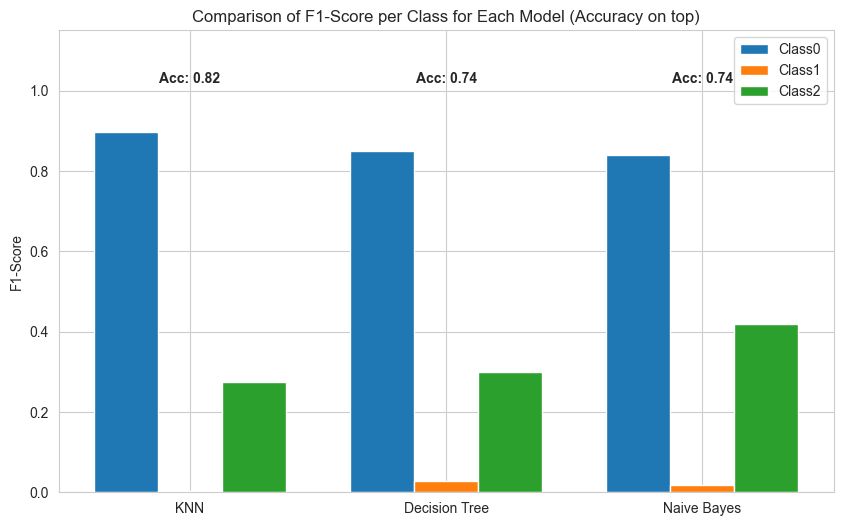

In [95]:



# إعداد الشكل
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# ألوان لكل Class
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # أزرق، برتقالي، أخضر

x = np.arange(len(comparison_df['Model']))  # مواقع الموديلات على المحور X
width = 0.25  # عرض الأعمدة

# رسم الأعمدة لكل Class
plt.bar(x - width, comparison_df['F1-Class0'], width, label='Class0', color=colors[0])
plt.bar(x, comparison_df['F1-Class1'], width, label='Class1', color=colors[1])
plt.bar(x + width, comparison_df['F1-Class2'], width, label='Class2', color=colors[2])

# إضافة Accuracy فوق كل موديل
for i, acc in enumerate(comparison_df['Accuracy']):
    plt.text(x[i], 1.02, f'Acc: {acc:.2f}', ha='center', fontweight='bold')

# إعداد المحاور والعناوين
plt.xticks(x, comparison_df['Model'])
plt.ylabel('F1-Score')
plt.title('Comparison of F1-Score per Class for Each Model (Accuracy on top)')
plt.ylim(0, 1.15)  # مساحة إضافية للـ Accuracy فوق الرسم
plt.legend()

plt.show()


Done!   Mohamed AshraF